# Select frequency-range for Fourier transform in CSEM modelling

Controlled-source electromagnetic responses in three dimenision are usually modelled directly in the domain where you want to process the data, hence a time-domain code for time-domain processing, and a frequency-domain for frequency-domain processing. However, under certain conditions it can be favourable to calculate the model in the
other domain and transform it with a (inverse) Fourier transform. The Fourier transform is generally very fast, in comparison with the 3D calculation of the electromagnetic response.

**Have a look at the [time-domain examples](https://empymod.github.io/emg3d-gallery/gallery/index.html#time-domain) in the [emg3d-gallery](https://empymod.github.io/emg3d-gallery) to see how a `Fourier`-instance can be used for compute transient CSEM responses.**

In [1]:
import emg3d
import freqselect  # Script in this directory
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Style adjustments
%matplotlib notebook
plt.style.use('ggplot')

Uncomment and run the following to have the notebook in full width.

In [3]:
#%%html
#<style>
#.output_wrapper .ui-dialog-titlebar {display: none;}
#.container { width:100% !important; }
#</style>

# Interactive frequency-selection App

## Note
- Depending on the signal the real or imaginary part is used:
  - `signal >= 0`: Sine transform, imaginary part is used,
  - `signal < 0`: Cosine transform, real part is used.
- The 1D-model is for an inline-survey:
  - `src = [0, 0, src_z]` (at the origin at a given depth),
  - `rec = [off, 0, rec_z]` (in-line receiver at a given offset and depth).
  
## Model

In [4]:
time = np.logspace(-2, 3, 301)  # Times; select a wide range.
src_z = 950                     # Source depth.
rec_z = 1000                    # Receiver depth.
depth = [0, 1000, 2000, 2100]   # Interfaces (m).
res = [2e14, 0.3, 1, 100, 1]    # Resistivities (Ohm.m).

rec = [np.array([1.5, 3, 6, 12])*1e3, np.zeros(4), rec_z]

# Collect it in a dict.
model = {
    'src': [0, 0, src_z],
    'rec': rec,
    'depth': depth,
    'res': res,
}

## Interactive frequency selection

<IPython.core.display.Javascript object>


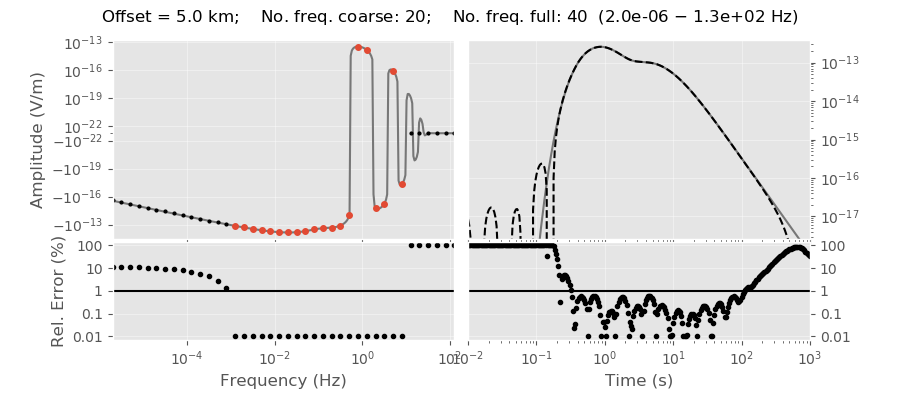

In [5]:
GUI = freqselect.InteractiveFrequency(
    src_z=src_z,
    rec_z=rec_z,
    depth=depth,
    res=res,
    time=time,
    ft='fftlog',
    xtfact=3,
    linlog='log',
)

## Example how to create a `Fourier` instance using the above parameters

In [6]:
Fourier = emg3d.utils.Fourier(
    time=GUI.time,      # Current times from the GUI.
    fmin=GUI.fmin,      # Current fmin from the GUI.
    fmax=GUI.fmax,      # Current fmax from the GUI.
    signal=GUI.signal,  # Current signal from the GUI.
    ft=GUI.ft,          # Current Fourier transform from the GUI.
    ftarg=GUI.ftarg,    # Current FT arguments from the GUI.
)

   time        [s] :  0.01 - 1000 : 301  [min-max; #]
   Fourier         :  FFTLog
     > pts_per_dec :  5
     > add_dec     :  [-2.  1.]
     > q           :  0.0
   Req. freq  [Hz] :  2.00364E-06 - 126.421 : 40  [min-max; #]
   Calc. freq [Hz] :  0.00126421 - 7.97664 : 20  [min-max; #]


In [7]:
emg3d.Report(['empymod'])

--------------------------------------------------------------------------------
  Date: Fri Feb 14 21:42:10 2020 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

           empymod : 1.10.3
             numpy : 1.17.4
             scipy : 1.3.2
             numba : 0.47.0
             emg3d : 0.9.3
           IPython : 7.11.1
        matplotlib : 3.1.1

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------